# Data exploration and preprocessing for X-Ray images

In [19]:
import numpy as np
import os
import scipy.special
import scipy.ndimage
import scipy.signal

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

import cv2

import sys

import matplotlib.pyplot as plt
import matplotlib.image as mping

%matplotlib inline

### Trivial Canny algorithm

(512, 424)


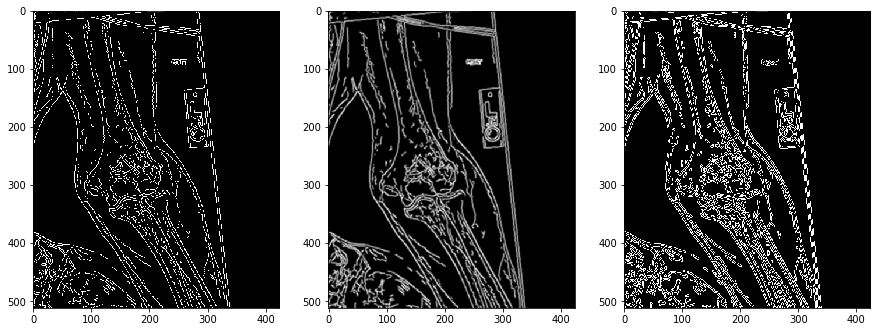

In [20]:
# Canny coefficients
K=5
THRESHOLD1=17
THRESHOLD2=10

orig_img = cv2.imread('image12.png', 0)

 
#dst = np.zeros(orig_img.shape, dtype=orig_img.dtype)

#blurred_img = cv2.medianBlur(orig_img, K)

blurred_img = cv2.GaussianBlur(orig_img ,(5,5),0)
#dst = cv2.CreateImage(cv2.GetSize(blurred_img ), 8, 1)
edges_img = cv2.Canny(blurred_img, THRESHOLD1, THRESHOLD2)
print(edges_img.shape)
#cv2.imwrite('edges_img.png',edges_img)
# Plot two images: original and after canny
fig=plt.figure(figsize=(15, 15))

fig.add_subplot(1, 3, 1)
plt.imshow(orig_img, cmap='gray')

fig.add_subplot(1, 3, 2)
plt.imshow(blurred_img, cmap='gray')

fig.add_subplot(1, 3, 3)
plt.imshow(edges_img, cmap='gray')

plt.show()








In [21]:
#тут роблю numpy Array X_train і роблю всі зображення розміру 406/512

pathName=""
X_train=[]
i=0    
for root, directories, filenames in os.walk('/home/volodymyr/MURA/XR_ELBOW'):
    #for directory in directories:
        #print (os.path.join(root, directory)) 
    for filename in filenames: 
        pathName=os.path.join(root,filename)
        
        orig_img = cv2.imread(pathName, 0)
        orig_img = cv2.resize(orig_img ,(406,512))
        X_train.append(orig_img)
        

print(type(X_train[0]))



<class 'numpy.ndarray'>


In [22]:
#тут роблю numpy Array Y_train
pathName=""
Y_train=[]
for root, directories, filenames in os.walk('/home/volodymyr/MURAA/XR_ELBOW_X'):
    #for directory in directories:
        #print (os.path.join(root, directory)) 
    for filename in filenames: 
        pathName=os.path.join(root,filename)
        file = np.loadtxt(pathName)
        Y_train.append(file)
        


print(Y_train[0])
#a = np.loadtxt('/home/volodymyr/MURAA/XR_ELBOW_X')

1.0


In [23]:
#pathName=""
#pathLastName=""
#nameImage="image"
#str1=".png"
#n=1
#i=0
#x_train;    
#for root, directories, filenames in os.walk('/home/volodymyr/MURA/XR_ELBOW'):
#    #for directory in directories:
#        #print (os.path.join(root, directory)) 
#    for filename in filenames: 
#        pathName=os.path.join(root,filename)
#        
#       orig_img = cv2.imread(pathName, 0)
#        orig_img = cv2.resize(orig_img ,(406,512))
#        plt.imshow(orig_img, cmap='gray')
#        print(orig_img.shape )
    
        

In [24]:
#pathName=""
#pathLastName=""
#nameImage="image"
#str1=".png"
#n=1
#i=0
    
#for root, directories, filenames in os.walk('/home/volodymyr/MURA/XR_WRIST'):
#    #for directory in directories:
#        #print (os.path.join(root, directory)) 
#    for filename in filenames: 
#        pathName=os.path.join(root,filename)
#        
#        orig_img = cv2.imread(pathName, 0)
#        
#        blurred_img = cv2.GaussianBlur(orig_img ,(5,5),0)
#        
#        edges_img = cv2.Canny(blurred_img, THRESHOLD1, THRESHOLD2)
#        
#        nameImage="image"
#        if pathLastName == pathName[: 43] :
#            n=n+1
#            nameImage=nameImage+(str(i))+""+(str(n))+str1
#            
#        else:
#            n=1
#            i=i+1
#            nameImage=nameImage+(str(i))+""+(str(n))+str1
#            pathLastName = pathName[: 43]
#            
#        cv2.imwrite(nameImage,edges_img)
#        print(nameImage)
    
        
        

In [25]:
#pathName=""
#pathLastName=""
#nameImage="image"
#str1=".txt"
#n=1
#i=0
#t=""
#for root, directories, filenames in os.walk('/home/volodymyr/MURA/XR_WRIST'):
#    #for directory in directories:
#        #print (os.path.join(root, directory)) 
#    for filename in filenames: 
#        pathName=os.path.join(root,filename)
#        if "negative" in  pathName :
#            t="0"
#        else:
#            t="1"
#            
#            
#        
#        nameImage="image"
#        if pathLastName == pathName[: 43] :
#           n=n+1
#            nameImage=nameImage+(str(i))+""+(str(n))+str1
#            
#        else:
#            n=1
#            i=i+1
#            nameImage=nameImage+(str(i))+""+(str(n))+str1
#            pathLastName = pathName[: 43]
#            
#        f= open(nameImage,"w+")
#        f.write(t)
#        f.close()
#        print(nameImage)
#

In [26]:
# todo: look here http://www.robindavid.fr/opencv-tutorial/chapter5-line-edge-and-contours-detection.html
# looks like something interesting for edge detection 
 
#def nothing(x):
#    pass
 
#img = blurred_img 
 
#canny_edge = cv2.Canny(img, 0, 0)
 
#cv2.imshow('image', img)
#cv2.imshow('canny_edge', canny_edge)
 
#cv2.createTrackbar('min_value','canny_edge',0,500,nothing)
#cv2.createTrackbar('max_value','canny_edge',0,500,nothing)
 
#while(1):
#    cv2.imshow('image', img)
#    cv2.imshow('canny_edge', canny_edge)
#    
#   min_value = cv2.getTrackbarPos('min_value', 'canny_edge')
#    max_value = cv2.getTrackbarPos('max_value', 'canny_edge')
# 
#   canny_edge = cv2.Canny(img, min_value, max_value)
#    
#   k = cv2.waitKey(37)
#   if k == 27:
#       break

